In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import ast

%matplotlib inline

# Ratings 

In [2]:
ratings_df = pd.read_csv("../Movies/Data/ratings.csv")

In [3]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [4]:
ratings_df.shape

(26024289, 4)

In [5]:
ratings_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [6]:
ratings_df['movieId'].is_unique

False

In [7]:
ratings_movieId = ratings_df['movieId']
ratings_movieId[ratings_movieId.duplicated(keep=False)]

0             110
1             147
2             858
3            1221
4            1246
            ...  
26024284    58559
26024285    60069
26024286    63082
26024287    64957
26024288    71878
Name: movieId, Length: 26016630, dtype: int64

In [8]:
ratings_cleaned_df = ratings_df[['movieId', 'rating']].groupby('movieId', as_index=False).mean()

In [9]:
ratings_cleaned_df

,movieId,rating
0,1,3.888157
1,2,3.236953
2,3,3.175550
3,4,2.875713
4,5,3.079565
...,...,...
45110,176267,4.000000
45111,176269,3.500000
45112,176271,5.000000
45113,176273,1.000000


In [10]:
ratings_cleaned_rounded_df = ratings_cleaned_df.copy()

In [11]:
def custom_round(x, base=5):
    return base * round(float(x)/base)

ratings_cleaned_rounded_df['rating'] = ratings_cleaned_df['rating'].squeeze()\
                                            .apply(lambda x: custom_round(x, base=.5))\
                                            .to_frame()

In [12]:
ratings_cleaned_rounded_df

,movieId,rating
0,1,4.0
1,2,3.0
2,3,3.0
3,4,3.0
4,5,3.0
...,...,...
45110,176267,4.0
45111,176269,3.5
45112,176271,5.0
45113,176273,1.0


In [13]:
ratings_cleaned_rounded_df[ratings_cleaned_rounded_df.movieId == 862]

,movieId,rating
847,862,3.5


In [14]:
ratings_cleaned_rounded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45115 entries, 0 to 45114
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  45115 non-null  int64  
 1   rating   45115 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 705.0 KB


# Data Exploration

In [15]:
movies_df = pd.read_csv("../Movies/Data/movies_metadata.csv")

C:\Users\mario\AppData\Local\Temp\ipykernel_23936\1839136310.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv("../Movies/Data/movies_metadata.csv")


In [16]:
movies_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [17]:
movies_df.shape

(45466, 24)

# Data Preparation

We will keep the columns that we are going to use

In [18]:
movies_df = movies_df[['id', 'title', 'genres', 'budget', 'revenue', 'vote_average']]

In [19]:
movies_df = movies_df.rename(columns={'vote_average': 'ratings'})

Thera are some errors like the one below, first we have to correct it

In [20]:
movies_df[movies_df.id == '1997-08-20']

,id,title,genres,budget,revenue,ratings
19730,1997-08-20,NaN,"[{'name': 'Carousel Productions', 'id': 11176}...",/ff9qCepilowshEtG2GYWwzt2bs4.jpg,NaN,NaN


In [21]:
movies_df = movies_df[movies_df["id"].str.contains("-") == False]

We see that the data types are wrong, let's format it

In [22]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45463 entries, 0 to 45465
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       45463 non-null  object 
 1   title    45460 non-null  object 
 2   genres   45463 non-null  object 
 3   budget   45463 non-null  object 
 4   revenue  45460 non-null  float64
 5   ratings  45460 non-null  float64
dtypes: float64(2), object(4)
memory usage: 2.4+ MB


In [23]:
movies_df['id'] = movies_df['id'].astype('int')
movies_df[['budget', 'revenue', 'ratings']] = movies_df[['budget', 'revenue', 'ratings']]\
                                                                                 .astype('float64')
movies_df['title'] = movies_df['title'].astype('string')

In [24]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45463 entries, 0 to 45465
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       45463 non-null  int32  
 1   title    45460 non-null  string 
 2   genres   45463 non-null  object 
 3   budget   45463 non-null  float64
 4   revenue  45460 non-null  float64
 5   ratings  45460 non-null  float64
dtypes: float64(3), int32(1), object(1), string(1)
memory usage: 2.3+ MB


Let's convert the genres column to lists of genres names only

In [25]:
def to_list(object_genre):
    all_genres = list()
    genres_dicts_all = ast.literal_eval(object_genre)
    for genres_dicts in genres_dicts_all:
        genre = str(genres_dicts['name'])
        all_genres.append(genre)
        
    return all_genres

In [26]:
movies_df['genres'] = movies_df['genres'].apply(to_list)

In [27]:
movies_df.head()

,id,title,genres,budget,revenue,ratings
0,862,Toy Story,"[Animation, Comedy, Family]",30000000.0,373554033.0,7.7
1,8844,Jumanji,"[Adventure, Fantasy, Family]",65000000.0,262797249.0,6.9
2,15602,Grumpier Old Men,"[Romance, Comedy]",0.0,0.0,6.5
3,31357,Waiting to Exhale,"[Comedy, Drama, Romance]",16000000.0,81452156.0,6.1
4,11862,Father of the Bride Part II,[Comedy],0.0,76578911.0,5.7


Now the genres column has a valid format, let's discard null values and movies whith a badget and revenue so small that it must be due to an error

In [28]:
movies_cleaned_df = movies_df[(movies_df.budget != 0) &\
                              (movies_df.revenue != 0) &\
                              (len(movies_df.genres) != 0)]

movies_cleaned_df = movies_cleaned_df[(movies_cleaned_df.revenue >= 7000) &\
                                      (movies_cleaned_df.budget >= 7000)]

In [29]:
movies_cleaned_df[['budget', 'revenue']] = movies_cleaned_df[['budget', 'revenue']]\
                                                        .apply(lambda x: x/(10**7))
movies_cleaned_df = movies_cleaned_df\
                    .rename(columns={'budget': 'budget_millions', 'revenue': 'revenue_millions'})

In [30]:
movies_cleaned_df = movies_cleaned_df.sort_values('budget_millions')

In [31]:
movies_cleaned_df

,id,title,genres,budget_millions,revenue_millions,ratings
8187,14337,Primer,"[Science Fiction, Drama, Thriller]",0.00070,0.042476,6.9
2374,47139,"Blood, Guts, Bullets and Octane","[Action, Comedy, Thriller]",0.00073,0.001367,6.0
18170,79120,Weekend,"[Drama, Romance]",0.00080,0.048459,7.5
14817,51022,The Wounds,"[War, Drama, Comedy, Crime]",0.00100,0.015000,7.2
3554,985,Eraserhead,"[Drama, Fantasy, Horror, Science Fiction]",0.00100,0.700000,7.5
...,...,...,...,...,...,...
44842,335988,Transformers: The Last Knight,"[Action, Science Fiction, Thriller, Adventure]",26.00000,60.494214,6.2
11067,1452,Superman Returns,"[Adventure, Fantasy, Action, Science Fiction]",27.00000,39.108119,5.4
26558,99861,Avengers: Age of Ultron,"[Action, Adventure, Science Fiction]",28.00000,140.540369,7.3
11827,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]",30.00000,96.100000,6.9


In [32]:
movies_cleaned_df.shape

(5291, 6)

In [33]:
df = movies_cleaned_df

In [34]:
genres_list = []
for i in range(0, df.shape[0]):
    for genre in df.iloc[i, 2]:
        if genre not in genres_list:
            genres_list.append(genre)

In [35]:
genres_list

['Science Fiction',
 'Drama',
 'Thriller',
 'Action',
 'Comedy',
 'Romance',
 'War',
 'Crime',
 'Fantasy',
 'Horror',
 'Mystery',
 'Foreign',
 'Documentary',
 'Family',
 'Animation',
 'History',
 'Music',
 'Adventure',
 'Western',
 'TV Movie']

In [36]:
genre_id = {}
for genre in genres_list:
    id_list = []
    for i in range(0, df.shape[0]):
        if genre in df.iloc[i, 2]:
            id_list.append(df.iloc[i, 0])
        genre_id[genre] = id_list

As we can se we had to reduce the number of rows from 45463 to 5291 due to the data cleaning process, but now we are ready to procede with the analysis

# Data Analysis

In [38]:
df[['budget_millions', 'revenue_millions', 'ratings']].describe()

,budget_millions,revenue_millions,ratings
count,5291.000000,5291.000000,5291.000000
mean,3.158695,9.181716,6.282272
std,4.031866,16.713997,0.911421
min,0.000700,0.000720,0.000000
25%,0.600000,0.780426,5.700000
50%,1.700000,3.082286,6.300000
75%,4.000000,10.088763,6.900000
max,38.000000,278.796509,9.100000


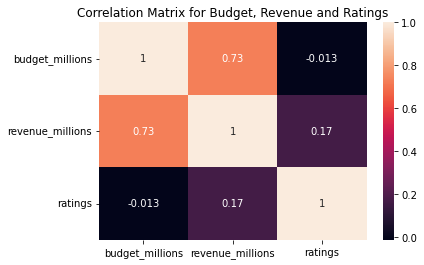

In [39]:
# finding correlations

correlation_matrix = df[['budget_millions', 'revenue_millions', 'ratings']].corr()

plt.title('Correlation Matrix for Budget, Revenue and Ratings')

sns.heatmap(correlation_matrix, annot=True)

plt.show()

In [40]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

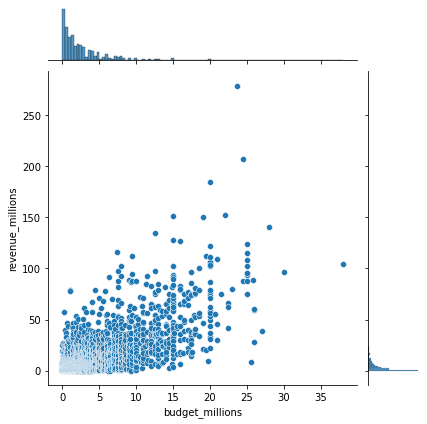

In [41]:
j = sns.jointplot(data = df, x ='budget_millions', y='revenue_millions')

<AxesSubplot:xlabel='budget_millions', ylabel='revenue_millions'>

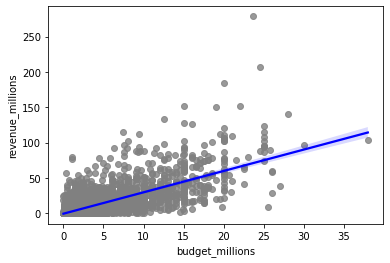

In [42]:
sns.regplot(x='budget_millions', y='revenue_millions', data=df, 
            scatter_kws={'color': 'grey'}, line_kws={'color': 'blue'})

<AxesSubplot:xlabel='budget_millions', ylabel='ratings'>

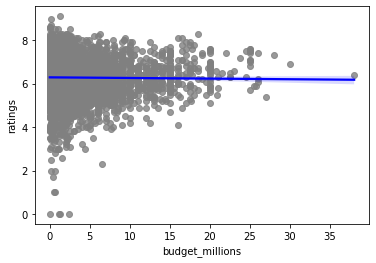

In [43]:
sns.regplot(x='budget_millions', y='ratings', data=df, 
            scatter_kws={'color': 'grey'}, line_kws={'color': 'blue'})

<AxesSubplot:xlabel='revenue_millions', ylabel='ratings'>

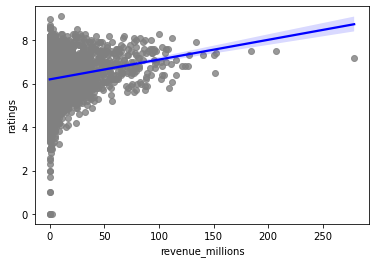

In [44]:
sns.regplot(x='revenue_millions', y='ratings', data=df, 
            scatter_kws={'color': 'grey'}, line_kws={'color': 'blue'})

### Analysis by Genre

In [45]:
# Budget by genre
genre_budget = {}
for key, value in genre_id.items():
    movie_list = []
    for movie in value:
        movie_list.append(df[df.id == movie].iloc[0, 3])
    genre_budget[key] = sorted(movie_list)

In [47]:
# Revenue by genre
genre_revenue = {}
for key, value in genre_id.items():
    movie_list = []
    for movie in value:
        movie_list.append(df[df.id == movie].iloc[0, 4])
    genre_revenue[key] = movie_list

In [49]:
# Ratings by genre
genre_ratings = {}
for key, value in genre_id.items():
    movie_list = []
    for movie in value:
        movie_list.append(df[df.id == movie].iloc[0, 5])
    genre_ratings[key] = movie_list

In [51]:
genre_sum_budget = {}
for key, values in genre_budget.items():
    genre_sum_budget[key] = sum(values)
    
genre_sum_budget = dict(sorted(genre_sum_budget.items(),
                           key=lambda item: item[1],
                           reverse=True))

In [52]:
genre_sum_budget

{'Action': 7031.219294599999,
 'Adventure': 6115.735496799999,
 'Drama': 5778.108799199997,
 'Comedy': 5226.892816399997,
 'Thriller': 4859.4429665,
 'Science Fiction': 3321.2725814999994,
 'Fantasy': 3160.6238794,
 'Family': 3075.140515,
 'Crime': 2410.900568899999,
 'Romance': 2165.9102353999997,
 'Animation': 1860.4727553,
 'Mystery': 1306.1664393000003,
 'Horror': 959.2914713999998,
 'History': 704.6798489,
 'War': 647.2789398,
 'Music': 382.52016290000006,
 'Western': 261.5911975,
 'Documentary': 25.329419299999998,
 'Foreign': 11.583320600000002,
 'TV Movie': 0.5}

In [53]:
genre_sum_revenue = {}
for key, values in genre_revenue.items():
    genre_sum_revenue[key] = sum(values)
    
genre_sum_revenue = dict(sorted(genre_sum_revenue.items(),
                           key=lambda item: item[1],
                           reverse=True))

In [54]:
genre_sum_revenue

{'Action': 19649.85560300002,
 'Adventure': 19617.444975200007,
 'Comedy': 15458.94164059999,
 'Drama': 14959.658322799993,
 'Thriller': 12605.866124900005,
 'Family': 10363.856598399992,
 'Fantasy': 10155.500348299996,
 'Science Fiction': 9660.341721499992,
 'Romance': 6765.631964200003,
 'Animation': 6553.5518947,
 'Crime': 6022.4757047999965,
 'Mystery': 3337.7021410999996,
 'Horror': 2979.3444271999974,
 'War': 1566.8194849999998,
 'History': 1450.9339110999997,
 'Music': 1279.0390702000004,
 'Western': 485.2297160000001,
 'Documentary': 103.46577840000002,
 'Foreign': 13.838571699999997,
 'TV Movie': 4.2}

In [55]:
genre_avg_budget = {}
for key, values in genre_budget.items():
    genre_avg_budget[key] = sum(values) / len(values)
    
genre_avg_budget = dict(sorted(genre_avg_budget.items(),
                           key=lambda item: item[1],
                           reverse=True))

In [56]:
genre_avg_budget

{'Adventure': 6.437616312421052,
 'Animation': 6.393377165979381,
 'Fantasy': 6.22170055,
 'Family': 5.8241297632575755,
 'Science Fiction': 5.255178135284809,
 'Action': 5.02588941715511,
 'Thriller': 3.281190389264011,
 'War': 3.2202932328358207,
 'History': 3.0374131418103447,
 'Western': 3.0067953735632185,
 'Mystery': 2.9685600893181827,
 'Comedy': 2.8766608785910828,
 'Crime': 2.839694427444051,
 'Drama': 2.2775359870713427,
 'Romance': 2.19666352474645,
 'Music': 2.023916205820106,
 'Horror': 1.6539508127586202,
 'TV Movie': 0.5,
 'Documentary': 0.4605348963636363,
 'Foreign': 0.39942484827586217}

In [57]:
genre_avg_revenue = {}
for key, values in genre_revenue.items():
    genre_avg_revenue[key] = sum(values) / len(values)
        
genre_avg_revenue = dict(sorted(genre_avg_revenue.items(),
                           key=lambda item: item[1],
                           reverse=True))

In [58]:
genre_avg_revenue

{'Animation': 22.520796889003435,
 'Adventure': 20.649942079157903,
 'Fantasy': 19.99114241791338,
 'Family': 19.62851628484847,
 'Science Fiction': 15.285350825158215,
 'Action': 14.045643747676928,
 'Thriller': 8.511725945239707,
 'Comedy': 8.507948068574567,
 'War': 7.795121815920397,
 'Mystery': 7.585686684318181,
 'Crime': 7.09361095971731,
 'Romance': 6.861695704056798,
 'Music': 6.76740248783069,
 'History': 6.254025478879309,
 'Drama': 5.896593741742213,
 'Western': 5.5773530574712655,
 'Horror': 5.13680073655172,
 'TV Movie': 4.2,
 'Documentary': 1.8811959709090913,
 'Foreign': 0.4771921275862068}

In [59]:
genre_avg_ratings = {}
for key, values in genre_ratings.items():
    genre_avg_ratings[key] = sum(values) / len(values)
    
genre_avg_ratings = dict(sorted(genre_avg_ratings.items(),
                           key=lambda item: item[1],
                           reverse=True))

In [60]:
genre_avg_ratings

{'Documentary': 6.827272727272726,
 'History': 6.796551724137925,
 'War': 6.714427860696518,
 'Western': 6.681609195402296,
 'Drama': 6.5261332282223155,
 'Animation': 6.475601374570447,
 'Music': 6.472486772486777,
 'Crime': 6.397762073027085,
 'Mystery': 6.35068181818181,
 'Romance': 6.3194726166328605,
 'Adventure': 6.249894736842102,
 'Family': 6.192803030303027,
 'Thriller': 6.183119513841997,
 'Fantasy': 6.174999999999999,
 'Action': 6.102859185132235,
 'Science Fiction': 6.101740506329112,
 'Comedy': 6.093065492570174,
 'TV Movie': 6.0,
 'Horror': 5.8336206896551674,
 'Foreign': 5.520689655172415}

In [61]:
%matplotlib inline
plt.rcParams['figure.figsize']= 20, 15

def myplot(dict_x: dict, dict_y: dict, genres: list):
    for genre in genres:
        plt.plot(dict_x[genre], dict_y[genre], ls='--', marker='o', ms=2.5, label=genre)
    plt.legend(loc='upper left', bbox_to_anchor =(1,1))
    plt.show()

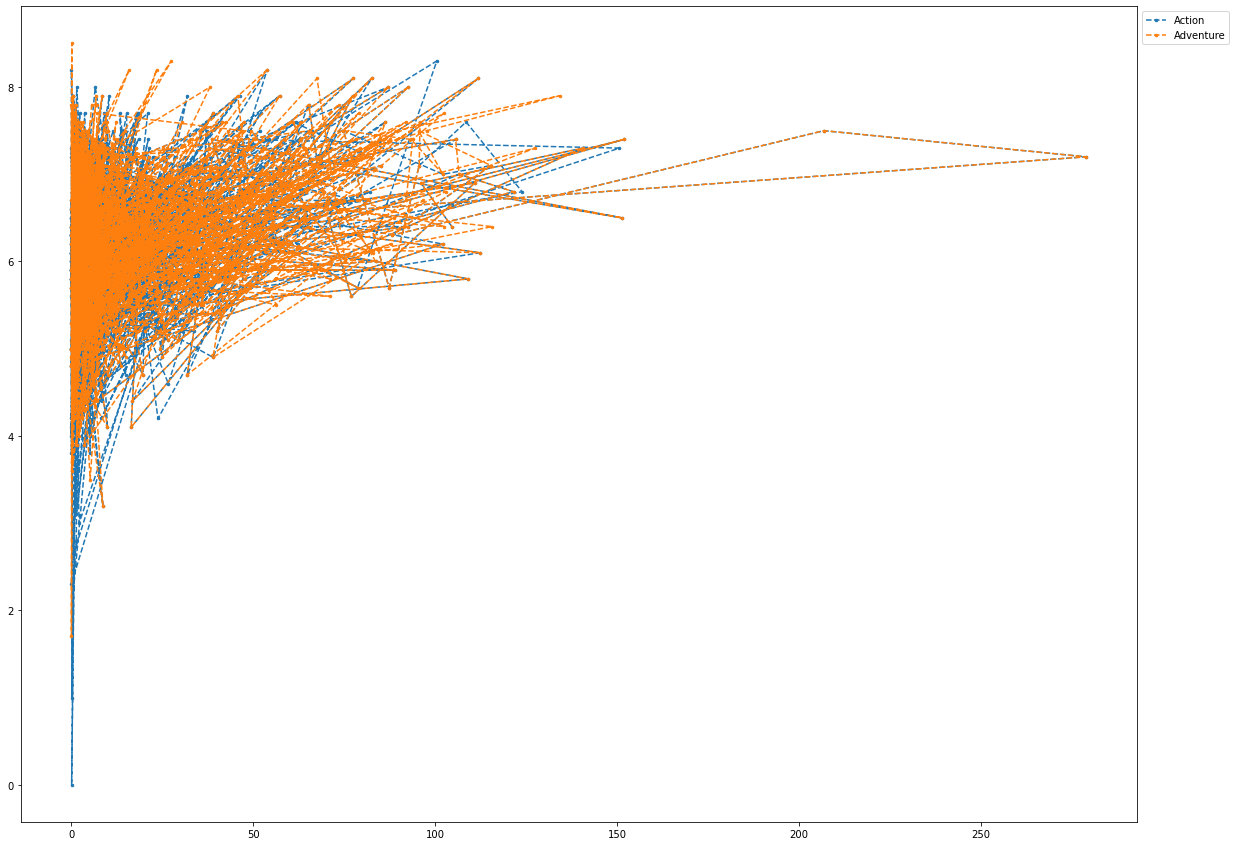

In [62]:
myplot(genre_revenue, genre_ratings, ['Action', 'Adventure'])

In [63]:
def plot_hist(genre_dict: dict):
    h = plt.hist([value for key, value in genre_dict.items()], bins=30, 
                 stacked=True, rwidth=1, label=[key for key in genre_dict.keys()])
    plt.legend()
    plt.show()

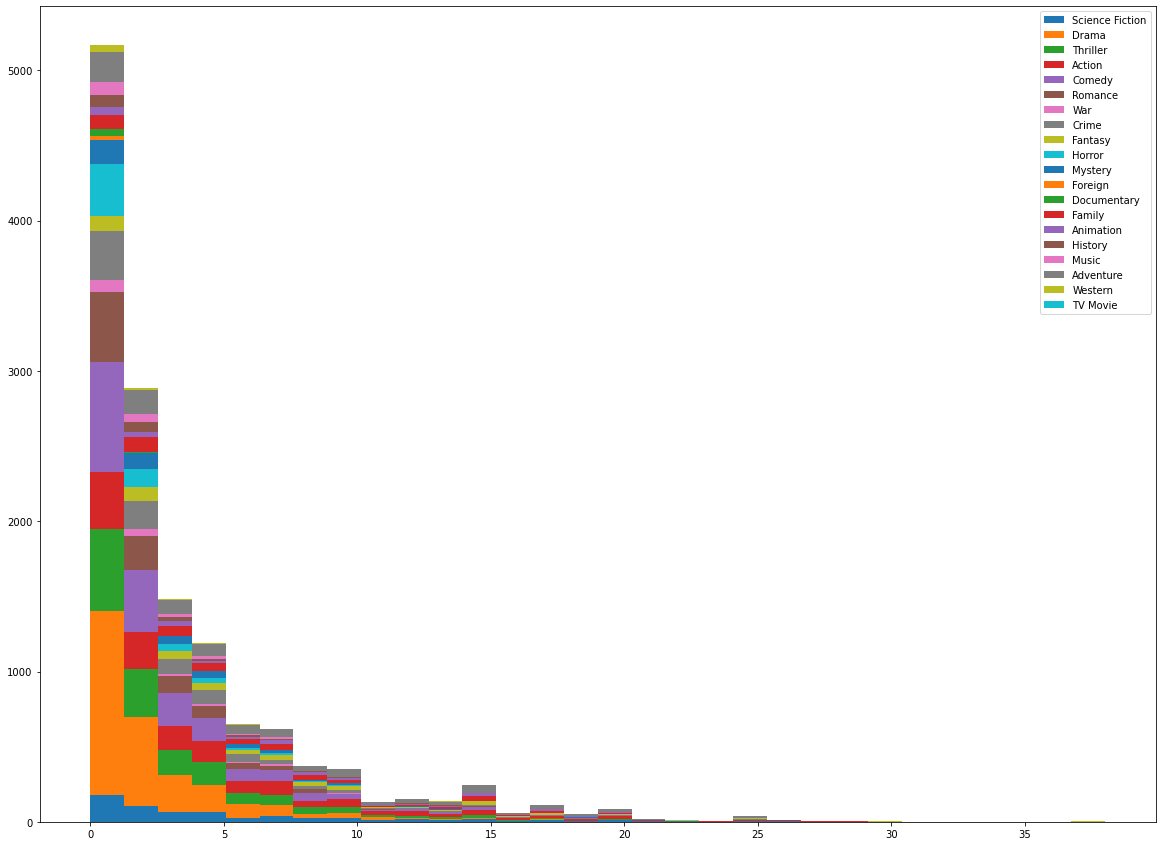

In [64]:
plot_hist(genre_budget)

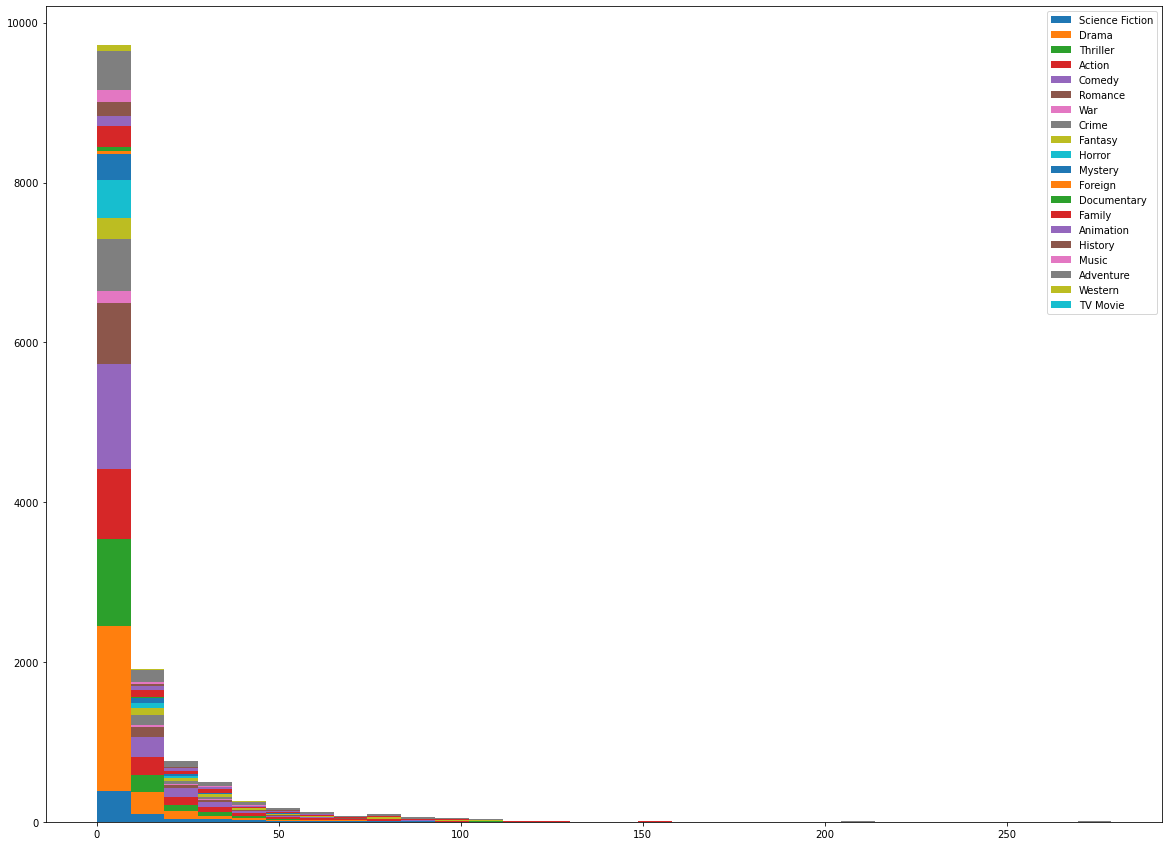

In [65]:
plot_hist(genre_revenue)

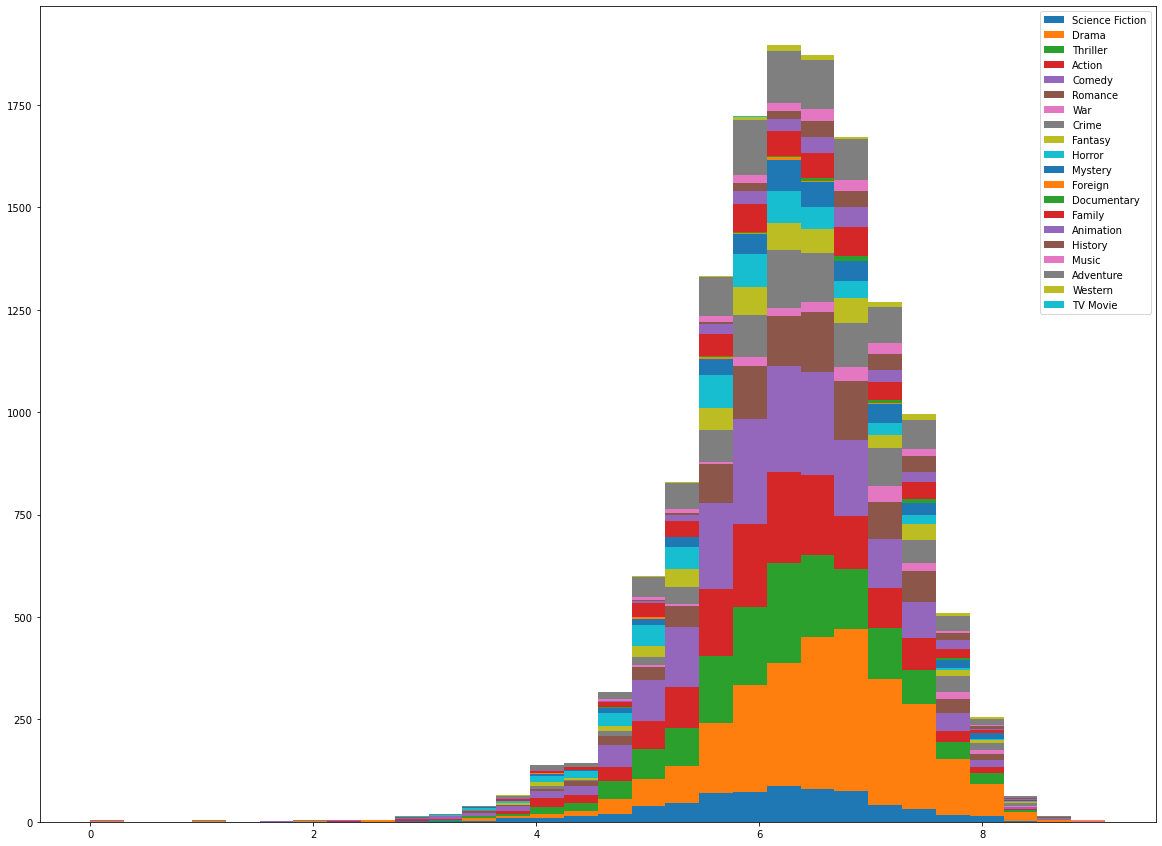

In [66]:
plot_hist(genre_ratings)